In [15]:
# 필요한 모듈 임포트
import numpy as np # 선형대수 
import pandas as pd # 데이터 프레임
%matplotlib inline 
# 그래프 쥬피터 노트북 위에 그려지게끔 
import seaborn as sns # 데이터 시각화 
import matplotlib.pyplot as plt # 데이터 시각화 

    데이터 출처 : https://rt.molit.go.kr
    기간 : 2011년 01월 01일 ~ 2020년 12월 31일
    범위 : 서울시 아파트 계약일을 기준으로 한 아파트 매매 거래 금액 
    
    read_csv 파일목록
    ./data/2011아파트실거래가.csv
    ./data/2012아파트실거래가.csv
    ./data/2013아파트실거래가.csv
    ./data/2014아파트실거래가.csv
    ./data/2015아파트실거래가.csv
    ./data/2016아파트실거래가.csv
    ./data/2017아파트실거래가.csv
    ./data/2018아파트실거래가.csv
    ./data/2019아파트실거래가.csv
    ./data/2020아파트실거래가.csv
    ./data/2021아파트실거래가.csv

In [30]:
apart11 = pd.read_csv("/Users/sewoongmoon/data/2011아파트실거래가.csv", encoding='CP949')
apart12 = pd.read_csv("/Users/sewoongmoon/data/2012아파트실거래가.csv", encoding='CP949')
apart13 = pd.read_csv("/Users/sewoongmoon/data/2013아파트실거래가.csv", encoding='CP949')
apart14 = pd.read_csv("/Users/sewoongmoon/data/2014아파트실거래가.csv", encoding='CP949')
apart15 = pd.read_csv("/Users/sewoongmoon/data/2015아파트실거래가.csv", encoding='CP949')
apart16 = pd.read_csv("/Users/sewoongmoon/data/2016아파트실거래가.csv", encoding='CP949')
apart17 = pd.read_csv("/Users/sewoongmoon/data/2017아파트실거래가.csv", encoding='CP949')
apart18 = pd.read_csv("/Users/sewoongmoon/data/2018아파트실거래가.csv", encoding='CP949')
apart19 = pd.read_csv("/Users/sewoongmoon/data/2019아파트실거래가.csv", encoding='CP949')
apart20 = pd.read_csv("/Users/sewoongmoon/data/2020아파트실거래가.csv", encoding='CP949')
apart21 = pd.read_csv("/Users/sewoongmoon/data/2021아파트실거래가.csv", encoding='CP949')

In [31]:
apart=pd.concat([apart11,apart12,apart13,apart14,apart15,apart16,apart17,apart18,apart19,apart20,apart21])

In [32]:
apart.head(3)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201107,9,"64,000",3,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201107,28,"65,500",5,1988,언주로 103,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,67.28,201101,19,"70,500",3,1987,언주로 3,NaN


In [33]:
apart["거래금액(만원)"]=apart["거래금액(만원)"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
apart["거래금액(만원)"]=apart["거래금액(만원)"].astype("int")

In [34]:
apart["거래금액(만원)/전용면적(㎡)"]=apart["거래금액(만원)"]/apart["전용면적(㎡)"]

In [35]:
monthly=[]
for year in range(11,22):
    for month in range(1,13):
        if month<10:
            date="20"+str(year)+"0"+str(month)
        else:
            date="20"+str(year)+str(month)
        monthly.append(int(date))
        

In [36]:
monthly=monthly[:-4]

In [37]:
med=[]
for month in monthly:
    med.append(apart[apart["계약년월"]==month]["거래금액(만원)/전용면적(㎡)"].mean())

In [38]:
med

[608.784192769166,
 581.568319658668,
 564.9748681452038,
 574.5133452686215,
 575.692227734163,
 575.361111431188,
 613.2249332308559,
 566.8193432133833,
 573.8600996540333,
 588.3505444183398,
 588.0452826473949,
 610.7135342351202,
 573.6255494012435,
 569.11762065722,
 566.1766144769759,
 583.9410853724008,
 591.5422206514411,
 557.0746589345362,
 563.9533760597099,
 547.0122104749768,
 568.8582013548488,
 571.6886239277645,
 579.4106203616368,
 586.9607430214444,
 588.1568022429788,
 590.185621856264,
 571.1758282351798,
 575.2972037929845,
 564.0427732743644,
 552.6705000399933,
 522.6383747212737,
 537.9871619855495,
 544.8439432240133,
 556.0317304603468,
 573.9097665572316,
 604.4297688066799,
 594.5134049529673,
 593.2576683920238,
 555.4334617689547,
 563.7739997909815,
 565.5992443814741,
 573.1270822492745,
 583.6445324852301,
 590.8006112003841,
 586.2678581284595,
 587.3295401213546,
 573.411823973976,
 601.6979219540711,
 593.1403309796159,
 593.6941845983142,
 594.295

In [39]:
monthlyMed=pd.DataFrame([monthly,med]).T

In [40]:
monthlyMed.columns=["계약년월","거래금액(만원)/전용면적(㎡)"]

In [41]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡)
0,201101.0,608.784193
1,201102.0,581.568320
2,201103.0,564.974868
3,201104.0,574.513345
4,201105.0,575.692228
...,...,...
123,202104.0,1364.642214
124,202105.0,1339.730926
125,202106.0,1325.764187
126,202107.0,1382.142506


In [42]:
monthlyMed["계약년월"]=monthlyMed["계약년월"].astype("int")
monthlyMed["계약년월"]=monthlyMed["계약년월"].astype("str")

In [43]:
monthlyMed["계약년도"]=monthlyMed["계약년월"].str[:4]
monthlyMed["계약당월"]=monthlyMed["계약년월"].str[-2:]

In [44]:
monthlyMed["계약날짜"]=monthlyMed["계약년도"]+'-'+monthlyMed["계약당월"]+'-15'

In [45]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡),계약년도,계약당월,계약날짜
0,201101,608.784193,2011,01,2011-01-15
1,201102,581.568320,2011,02,2011-02-15
2,201103,564.974868,2011,03,2011-03-15
3,201104,574.513345,2011,04,2011-04-15
4,201105,575.692228,2011,05,2011-05-15
...,...,...,...,...,...
123,202104,1364.642214,2021,04,2021-04-15
124,202105,1339.730926,2021,05,2021-05-15
125,202106,1325.764187,2021,06,2021-06-15
126,202107,1382.142506,2021,07,2021-07-15


In [46]:
import datetime
monthlyMed["계약날짜"]=pd.to_datetime(monthlyMed["계약날짜"])

In [47]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡),계약년도,계약당월,계약날짜
0,201101,608.784193,2011,01,2011-01-15
1,201102,581.568320,2011,02,2011-02-15
2,201103,564.974868,2011,03,2011-03-15
3,201104,574.513345,2011,04,2011-04-15
4,201105,575.692228,2011,05,2011-05-15
...,...,...,...,...,...
123,202104,1364.642214,2021,04,2021-04-15
124,202105,1339.730926,2021,05,2021-05-15
125,202106,1325.764187,2021,06,2021-06-15
126,202107,1382.142506,2021,07,2021-07-15


In [48]:
timeSeries_medv=monthlyMed[["계약날짜","거래금액(만원)/전용면적(㎡)"]]

In [49]:
timeSeries_medv.to_csv("medv2011to2021",header=True,index=False)

/Users/sewoongmoon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sewoongmoon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sewoongmoon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sewoongmoon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sewoongmoon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sewoongmoon/opt/anaconda3/li

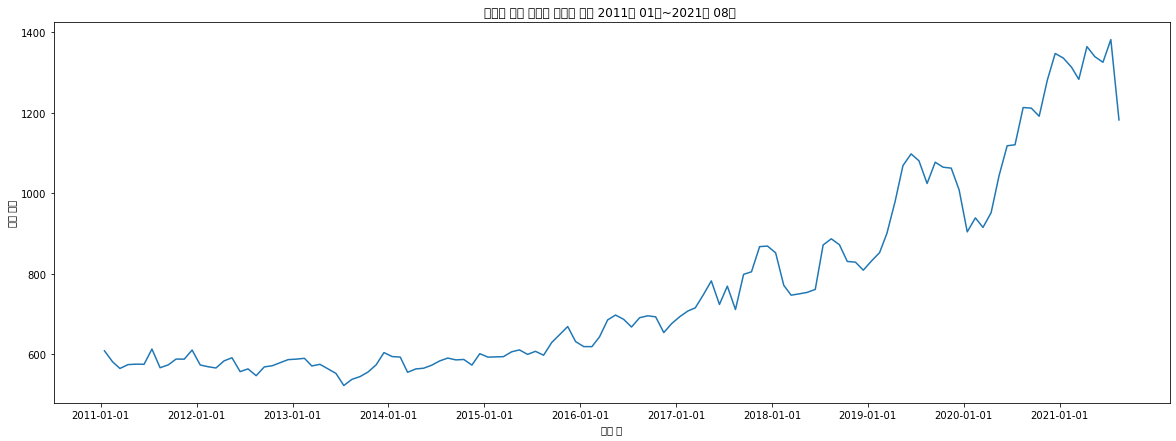

In [50]:
plt.figure(figsize=(20,7)) ## 크기 조절

plt.plot(timeSeries_medv["계약날짜"],timeSeries_medv["거래금액(만원)/전용면적(㎡)"]) ## 내용 설정

plt.title('서울시 평균 아파트 매매가 추이 2011년 01월~2021년 08월 ')  ## 타이틀
plt.xlabel('기준 월')  ## x축
plt.ylabel('평당 가격')  ## y축

plt.xticks(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
## x축 감격 설정

plt.show()

## 서울시 주택 담보 대출 2011년~2021년까지 
    출처 : https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_008Y003
    기간 2011년 01월 ~ 2021년 08월
    (단위 : 십억원)
## read_csv하는데 필요한 파일목록
    ./data/서울시_주택담보대출.csv


In [53]:
mortgage = pd.read_csv('/Users/sewoongmoon/data/서울시_주택담보대출.csv', encoding='CP949')

In [54]:
mortgage.head(10)

,계정코드별,지역코드별,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,...,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05
0,예금취급기관,서울,193139.8,193848.4,194886.7,195633.0,196699.9,197868.1,198817.2,199989.5,...,345570.0,350203.9,355160.8,361190.4,363817.0,368505.5,371717.3,375179.8,385299.8,383313.8
1,주택담보대출,서울,124710.3,125280.3,126216.0,126822.7,126687.8,127018.0,127536.8,127651.6,...,205553.4,208142.8,210849.4,212534.2,214865.7,217196.4,220054.2,222423.7,224023.6,225226.0
2,기타대출,서울,68429.5,68568.1,68670.7,68810.3,70012.1,70850.1,71280.4,72337.8,...,140016.7,142061.1,144311.4,148656.1,148951.3,151309.1,151663.2,152756.2,161276.2,158087.8
3,예금은행,서울,169489.2,170077.8,170858.8,171365.5,172186.6,173081.5,173692.4,174583.9,...,298771.6,303023.1,307478.0,312736.3,314963.4,318912.2,321493.4,324146.7,332640.9,330308.3
4,주택담보대출,서울,110023.5,110519.4,111300.8,111772.6,111618.7,111827.7,112259.3,112255.8,...,190483.9,193141.5,195840.5,197539.2,199946.5,202250.9,204918.2,207094.9,208558.5,209714.0
5,기타대출,서울,59465.8,59558.4,59558.0,59592.9,60567.9,61253.8,61433.1,62328.1,...,108287.7,109881.6,111637.5,115197.1,115016.9,116661.3,116575.2,117051.8,124082.4,120594.3
6,비은행예금취급기관,서울,23650.5,23770.6,24028.0,24267.5,24513.2,24786.6,25124.8,25405.6,...,46798.4,47180.8,47682.8,48454.1,48853.5,49593.3,50223.9,51033.1,52658.9,53005.4
7,주택담보대출,서울,14686.8,14760.8,14915.2,15050.1,15069.1,15190.3,15277.5,15395.8,...,15069.5,15001.3,15008.9,14995.1,14919.1,14945.5,15135.9,15328.7,15465.1,15512.0
8,기타대출,서울,8963.7,9009.8,9112.8,9217.4,9444.1,9596.3,9847.3,10009.8,...,31729.0,32179.5,32673.8,33459.0,33934.4,34647.8,35088.0,35704.4,37193.8,37493.5
9,상호저축은행,서울,3973.4,4071.7,4175.8,4320.7,4437.3,4565.4,4767.8,4840.0,...,18892.8,19293.1,19770.7,20318.7,20793.5,21375.2,21759.5,22301.8,23118.4,23672.1


In [55]:
seoul_mortgage=mortgage.iloc[1:2,2:]

In [56]:
seoul_mortgage

,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,2011. 10,...,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05
1,124710.3,125280.3,126216.0,126822.7,126687.8,127018.0,127536.8,127651.6,128044.9,128497.6,...,205553.4,208142.8,210849.4,212534.2,214865.7,217196.4,220054.2,222423.7,224023.6,225226.0


In [57]:
seoul_mortgage1=seoul_mortgage.T.reset_index()

# 주택 담보 대출 금리 
    데이터 출처 : https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_005Y004
    기간 : 2011년 01월~ 2021년 06월

In [60]:
interest_rate=pd.read_csv("/Users/sewoongmoon/data/주택담보대출이자율.csv",encoding='CP949')

In [61]:
interest_rate.head(20)

,계정항목코드별,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
0,종금사할인어음,3.91,4.35,4.90,3.98,4.15,4.46,4.23,4.22,4.18,...,1.24,1.22,1.17,1.31,1.11,1.20,1.35,1.21,1.07,1.46
1,계약금액내대출,12.30,11.42,11.51,10.78,11.55,11.39,13.93,11.94,13.22,...,-,0.00,-,-,-,-,-,-,-,-
2,할인어음,9.89,10.27,9.97,9.62,10.25,9.90,9.64,9.49,9.88,...,6.50,6.07,5.19,6.59,7.07,7.39,6.48,6.57,7.21,7.28
3,일반대출,15.00,15.22,15.41,15.41,16.72,15.07,17.50,16.71,16.71,...,9.73,10.18,10.05,9.94,10.14,10.11,9.70,9.96,10.21,9.71
4,기업자금대출1),10.22,10.31,10.51,10.12,10.42,10.04,10.43,10.44,10.57,...,5.99,6.02,5.93,6.14,6.07,6.08,6.03,6.05,6.27,6.40
5,가계자금대출 1),21.22,21.16,23.42,23.22,23.71,23.68,23.22,22.95,23.25,...,14.41,14.22,14.05,13.98,14.25,14.40,14.04,14.00,13.76,13.48
6,주택담보대출,-,-,-,-,-,-,-,-,-,...,5.41,4.84,5.24,5.21,4.90,5.08,4.84,5.34,4.92,4.91
7,기타담보대출,-,-,-,-,-,-,-,-,-,...,7.46,6.90,6.92,7.14,7.20,7.92,7.76,8.02,8.03,7.50
8,보증대출,-,-,-,-,-,-,-,-,-,...,8.76,8.60,8.66,8.62,8.78,8.76,8.55,8.35,8.17,8.08
9,일반신용대출,-,-,-,-,-,-,-,-,-,...,16.83,16.94,16.51,16.72,16.52,16.49,16.12,15.67,15.39,15.33


In [62]:
interest_rate.iloc[6:7,:]

,계정항목코드별,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
6,주택담보대출,-,-,-,-,-,-,-,-,-,...,5.41,4.84,5.24,5.21,4.90,5.08,4.84,5.34,4.92,4.91


In [63]:
mortgage_rate=interest_rate.iloc[6:7,1:]

In [64]:
mortgage_rate

,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,2011. 10,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
6,-,-,-,-,-,-,-,-,-,-,...,5.41,4.84,5.24,5.21,4.90,5.08,4.84,5.34,4.92,4.91


In [65]:
mortgage_rate1=mortgage_rate.T.reset_index()

In [66]:
mortgage_rate1

,index,6
0,2011. 01,-
1,2011. 02,-
2,2011. 03,-
3,2011. 04,-
4,2011. 05,-
...,...,...
121,2021. 02,5.08
122,2021. 03,4.84
123,2021. 04,5.34
124,2021. 05,4.92


In [67]:
timeSeries_medv

,계약날짜,거래금액(만원)/전용면적(㎡)
0,2011-01-15,608.784193
1,2011-02-15,581.568320
2,2011-03-15,564.974868
3,2011-04-15,574.513345
4,2011-05-15,575.692228
...,...,...
123,2021-04-15,1364.642214
124,2021-05-15,1339.730926
125,2021-06-15,1325.764187
126,2021-07-15,1382.142506


In [68]:
pd.concat([timeSeries_medv,seoul_mortgage1,mortgage_rate1],axis=1)

,계약날짜,거래금액(만원)/전용면적(㎡),index,1,index,6
0,2011-01-15,608.784193,2011. 01,124710.3,2011. 01,-
1,2011-02-15,581.568320,2011. 02,125280.3,2011. 02,-
2,2011-03-15,564.974868,2011. 03,126216.0,2011. 03,-
3,2011-04-15,574.513345,2011. 04,126822.7,2011. 04,-
4,2011-05-15,575.692228,2011. 05,126687.8,2011. 05,-
...,...,...,...,...,...,...
123,2021-04-15,1364.642214,2021. 04,224023.6,2021. 04,5.34
124,2021-05-15,1339.730926,2021. 05,225226.0,2021. 05,4.92
125,2021-06-15,1325.764187,NaN,NaN,2021. 06,4.91
126,2021-07-15,1382.142506,NaN,NaN,NaN,NaN


In [72]:
kospi=pd.read_excel("/Users/sewoongmoon/data/종합주가지수 (2).xlsx")

In [1662]:
kospi

,* 통계표명 :,종합주가지수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 476,Unnamed: 477,Unnamed: 478,Unnamed: 479,Unnamed: 480,Unnamed: 481,Unnamed: 482,Unnamed: 483,Unnamed: 484,Unnamed: 485
0,* 수록기간 :,1981년 01월 ~ 2021년 05월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* 조회기간 :,1981년 01월 ~ 2021년 05월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* 출처 :,한국은행,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,* 자료다운일자 :,2021.08.13 13:26:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* 단위 :,지수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,지 역,1981년 01월,1981년 02월,1981년 03월,1981년 04월,1981년 05월,1981년 06월,1981년 07월,1981년 08월,1981년 09월,...,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월,2021년 01월,2021년 02월,2021년 03월,2021년 04월,2021년 05월


In [73]:
kospi1=kospi.iloc[9:11,-125:].T.reset_index()

In [74]:
kospi2=kospi1.iloc[:,1:]

## 월별 원/달러 환율
    데이터 출처 : https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1068
    기간 : 2011년 01월 ~ 2021년 07월 
## read_csv 필요한 파일
    - ./data/exchange_rate.xls

In [77]:
exchange_rate=pd.read_excel("/Users/sewoongmoon/data/exchange_rate.xls")

In [78]:
exchange_rate

,통계표명:,환율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128
0,단위:,원/달러,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2011\r\n01월,2011\r\n02월,2011\r\n03월,2011\r\n04월,2011\r\n05월,2011\r\n06월,2011\r\n07월,2011\r\n08월,...,2020\r\n10월,2020\r\n11월,2020\r\n12월,2021\r\n01월,2021\r\n02월,2021\r\n03월,2021\r\n04월,2021\r\n05월,2021\r\n06월,2021\r\n07월
2,원/달러,환율,"1,121.5","1,128.7","1,096.7","1,071.5","1,079.2","1,067.7","1,054.5","1,066.8",...,"1,135.1","1,106.5","1,086.3","1,118.8","1,123.5","1,131.8","1,112.3","1,110.9","1,126.1","1,150.3"
3,NaN,절상율(%),1.2,0.5,3.5,5.9,5.2,6.3,7.6,6.4,...,1.9,4.5,6.5,-2.9,-3.3,-4.0,-2.3,-2.2,-3.5,-5.6
4,엔/달러,환율,82.0,81.7,82.7,81.5,81.4,80.4,77.5,76.6,...,104.3,103.9,103.3,104.5,106.2,110.7,108.8,109.7,110.5,109.6
5,NaN,절상율(%),-0.7,-0.3,-1.6,-0.1,0.1,1.3,5.0,6.4,...,4.7,5.0,5.6,-1.1,-2.6,-6.7,-5.0,-5.8,-6.5,-5.7
6,원/100엔,환율,"1,367.9","1,382.2","1,325.6","1,314.1","1,326.1","1,328.2","1,360.3","1,393.4",...,"1,088.8","1,065.2","1,051.2","1,070.7","1,058.4","1,022.2","1,022.4","1,012.3","1,019.3","1,049.5"
7,NaN,절상율(%),1.9,0.8,5.1,6.1,5.1,4.9,2.4,0.0,...,-2.7,-0.5,0.8,-1.8,-0.7,2.8,2.8,3.8,3.1,0.2
8,출처:,기획재정부 (통화별 환율 조사통계),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,주석:,"* 환율은 서울외환시장 종가(15:00현재, '05.2월 이전은 16:00현재, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
exchange_rate1=exchange_rate.iloc[1:3,2:].T.reset_index()

In [80]:
exchange_rate2=exchange_rate1.iloc[:,1:]

In [81]:
exchange_rate2

,1,2
0,2011\r\n01월,"1,121.5"
1,2011\r\n02월,"1,128.7"
2,2011\r\n03월,"1,096.7"
3,2011\r\n04월,"1,071.5"
4,2011\r\n05월,"1,079.2"
...,...,...
122,2021\r\n03월,"1,131.8"
123,2021\r\n04월,"1,112.3"
124,2021\r\n05월,"1,110.9"
125,2021\r\n06월,"1,126.1"


In [82]:
TimeSeries=pd.concat([timeSeries_medv,seoul_mortgage1,mortgage_rate1,kospi2,exchange_rate2],axis=1)

In [83]:
TimeSeries.head(50)

,계약날짜,거래금액(만원)/전용면적(㎡),index,1,index,6,9,10,1,2
0,2011-01-15,608.784193,2011. 01,124710.3,2011. 01,-,2011년 01월,2091.61,2011\r\n01월,"1,121.5"
1,2011-02-15,581.568320,2011. 02,125280.3,2011. 02,-,2011년 02월,2002.87,2011\r\n02월,"1,128.7"
2,2011-03-15,564.974868,2011. 03,126216.0,2011. 03,-,2011년 03월,2002.67,2011\r\n03월,"1,096.7"
3,2011-04-15,574.513345,2011. 04,126822.7,2011. 04,-,2011년 04월,2153.13,2011\r\n04월,"1,071.5"
4,2011-05-15,575.692228,2011. 05,126687.8,2011. 05,-,2011년 05월,2121.87,2011\r\n05월,"1,079.2"
5,2011-06-15,575.361111,2011. 06,127018.0,2011. 06,-,2011년 06월,2074.64,2011\r\n06월,"1,067.7"
6,2011-07-15,613.224933,2011. 07,127536.8,2011. 07,-,2011년 07월,2150.06,2011\r\n07월,"1,054.5"
7,2011-08-15,566.819343,2011. 08,127651.6,2011. 08,-,2011년 08월,1869.41,2011\r\n08월,"1,066.8"
8,2011-09-15,573.860100,2011. 09,128044.9,2011. 09,-,2011년 09월,1790.95,2011\r\n09월,"1,178.1"
9,2011-10-15,588.350544,2011. 10,128497.6,2011. 10,-,2011년 10월,1825.88,2011\r\n10월,"1,110.0"


In [120]:
TimeSeries

,계약날짜,제곱미터당아파트가격,계약날짜1,서울시주택담보대출(단위:십억원),계약날짜2,주택이자율,계약날짜3,코스피지수,계약날짜4,환율(원/달러)
0,2011-01-15,608.784193,2011. 01,124710.3,2011. 01,-,2011년 01월,2091.61,2011\r\n01월,11215.0
1,2011-02-15,581.568320,2011. 02,125280.3,2011. 02,-,2011년 02월,2002.87,2011\r\n02월,11287.0
2,2011-03-15,564.974868,2011. 03,126216.0,2011. 03,-,2011년 03월,2002.67,2011\r\n03월,10967.0
3,2011-04-15,574.513345,2011. 04,126822.7,2011. 04,-,2011년 04월,2153.13,2011\r\n04월,10715.0
4,2011-05-15,575.692228,2011. 05,126687.8,2011. 05,-,2011년 05월,2121.87,2011\r\n05월,10792.0
...,...,...,...,...,...,...,...,...,...,...
123,2021-04-15,1364.642214,2021. 04,224023.6,2021. 04,5.34,2021년 04월,3165.08,2021\r\n04월,11123.0
124,2021-05-15,1339.730926,2021. 05,225226.0,2021. 05,4.92,2021년 05월,3169.2,2021\r\n05월,11109.0
125,2021-06-15,1325.764187,NaN,NaN,2021. 06,4.91,NaN,NaN,2021\r\n06월,11261.0
126,2021-07-15,1382.142506,NaN,NaN,NaN,NaN,NaN,NaN,2021\r\n07월,11503.0


In [121]:
TimeSeries.columns=["계약날짜","제곱미터당아파트가격","계약날짜1","서울시주택담보대출(단위:십억원)","계약날짜2","주택이자율","계약날짜3","코스피지수","계약날짜4","환율(원/달러)"]

In [122]:
TimeSeries["환율(원/달러)"]=TimeSeries["환율(원/달러)"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

AttributeError: Can only use .str accessor with string values!

In [ ]:
TimeSeries["환율(원/달러)"]=TimeSeries["환율(원/달러)"].astype("float")

In [123]:
TimeSeries1=TimeSeries[["계약날짜","제곱미터당아파트가격","서울시주택담보대출(단위:십억원)","주택이자율","코스피지수","환율(원/달러)"]].iloc[40:-3,:]

In [124]:
TimeSeries1

,계약날짜,제곱미터당아파트가격,서울시주택담보대출(단위:십억원),주택이자율,코스피지수,환율(원/달러)
40,2014-05-15,565.599244,128903.2,7.63,1994.13,10201.0
41,2014-06-15,573.127082,129784.1,7.61,1995.08,10118.0
42,2014-07-15,583.644532,130921.4,7.56,2021.95,10279.0
43,2014-08-15,590.800611,131869.6,7.60,2060.93,10140.0
44,2014-09-15,586.267858,133147.8,7.43,2042.71,10552.0
...,...,...,...,...,...,...
120,2021-01-15,1336.175163,217196.4,4.90,3089.27,11188.0
121,2021-02-15,1313.692868,220054.2,5.08,3092.41,11235.0
122,2021-03-15,1283.313250,222423.7,4.84,3032.47,11318.0
123,2021-04-15,1364.642214,224023.6,5.34,3165.08,11123.0


In [125]:
d1= TimeSeries1.iloc[40, :]
d1

계약날짜                 2017-09-15 00:00:00
제곱미터당아파트가격                    798.817388
서울시주택담보대출(단위:십억원)               174828.7
주택이자율                               6.15
코스피지수                            2371.84
환율(원/달러)                         11454.0
Name: 80, dtype: object

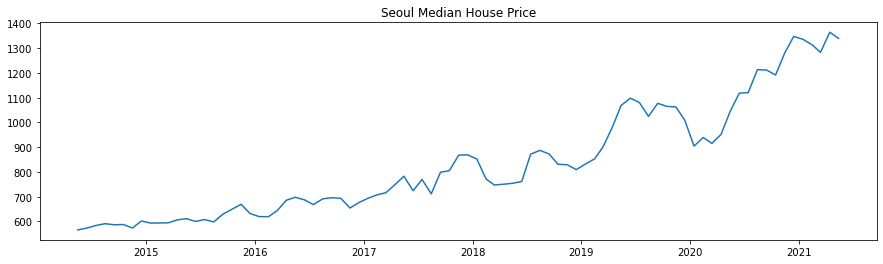

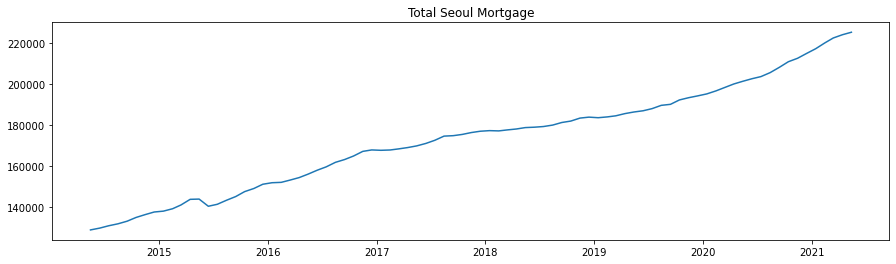

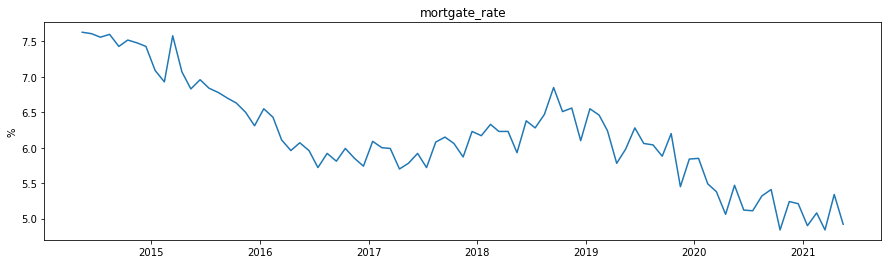

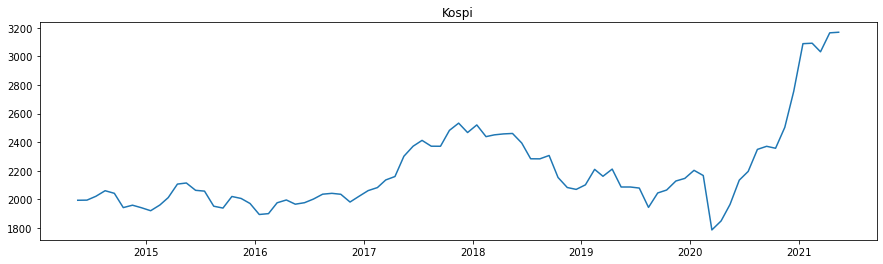

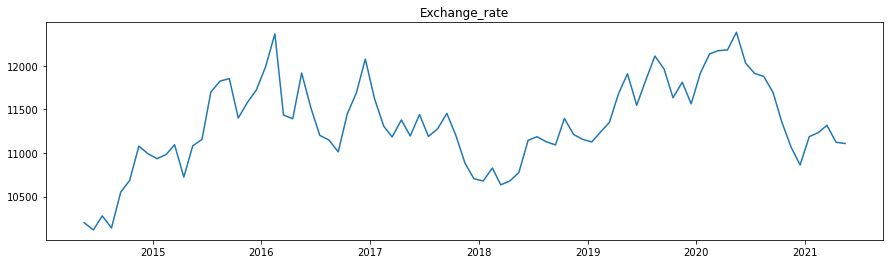

In [89]:
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["제곱미터당아파트가격"]) ## 내용 설정
plt.title('Seoul Median House Price')  ## 타이틀
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["서울시주택담보대출(단위:십억원)"].astype("float"))
plt.title('Total Seoul Mortgage')  ## 타이틀
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["주택이자율"].astype("float"))
plt.title('mortgate_rate')  ## 타이틀
plt.ylabel('%')  ## y축
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["코스피지수"])
plt.title('Kospi')  ## 타이틀
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["환율(원/달러)"].astype("float"))
plt.title('Exchange_rate')  ## 타이틀
plt.show()

In [90]:
TimeSeries1["제곱미터당아파트가격"]=TimeSeries1["제곱미터당아파트가격"].astype('float')
TimeSeries1["서울시주택담보대출(단위:십억원)"]=TimeSeries1["서울시주택담보대출(단위:십억원)"].astype('float')
TimeSeries1["주택이자율"]=TimeSeries1["주택이자율"].astype('float')
TimeSeries1["코스피지수"]=TimeSeries1["코스피지수"].astype('float')
TimeSeries1["환율(원/달러)"]=TimeSeries1["환율(원/달러)"].astype('float')

In [91]:
TimeSeries1["코스피지수"].describe()

count      85.000000
mean     2200.544000
std       297.845761
min      1786.750000
25%      2002.480000
50%      2086.900000
75%      2357.820000
max      3169.200000
Name: 코스피지수, dtype: float64

In [92]:
TimeSeries1["코스피지수"].min()

1786.75

In [93]:
TimeSeries2=TimeSeries1.copy()

In [94]:
TimeSeries2["제곱미터당아파트가격"]=(TimeSeries1["제곱미터당아파트가격"]-TimeSeries1["제곱미터당아파트가격"].min())/(TimeSeries1["제곱미터당아파트가격"].max()-TimeSeries1["제곱미터당아파트가격"].min())
TimeSeries2["서울시주택담보대출(단위:십억원)"]=(TimeSeries1["서울시주택담보대출(단위:십억원)"]-TimeSeries1["서울시주택담보대출(단위:십억원)"].min())/(TimeSeries1["서울시주택담보대출(단위:십억원)"].max()-TimeSeries1["서울시주택담보대출(단위:십억원)"].min())
TimeSeries2["주택이자율"]=(TimeSeries1["주택이자율"]-TimeSeries1["주택이자율"].min())/(TimeSeries1["주택이자율"].max()-TimeSeries1["주택이자율"].min())
TimeSeries2["코스피지수"]=(TimeSeries1["코스피지수"]-TimeSeries1["코스피지수"].min())/(TimeSeries1["코스피지수"].max()-TimeSeries1["코스피지수"].min())
TimeSeries2["환율(원/달러)"]=(TimeSeries1["환율(원/달러)"]-TimeSeries1["환율(원/달러)"].min())/(TimeSeries1["환율(원/달러)"].max()-TimeSeries1["환율(원/달러)"].min())


In [95]:
np.linspace(TimeSeries1["주택이자율"].min(),TimeSeries1["주택이자율"].max(),5).astype('str')

array(['4.84', '5.5375', '6.234999999999999', '6.9325', '7.63'],
      dtype='<U32')

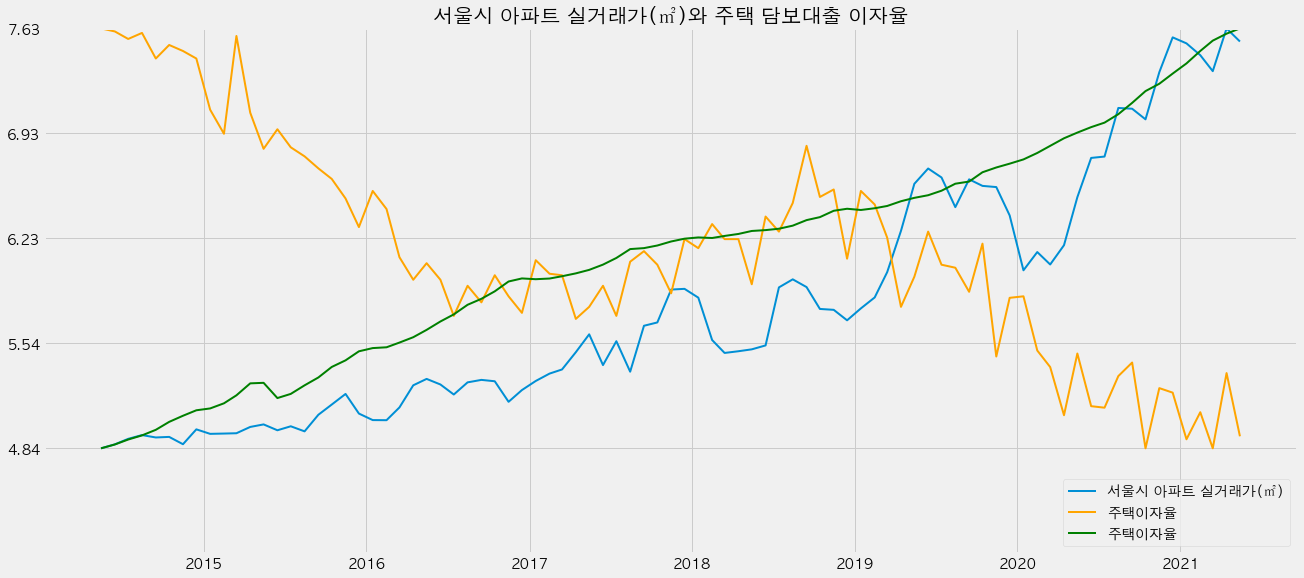

In [96]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2 ,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["주택이자율"],color='orange',linewidth=2, markersize=12,label="주택이자율")
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["서울시주택담보대출(단위:십억원)"],color='green',linewidth=2, markersize=12,label="주택이자율")
plt.title('서울시 아파트 실거래가(㎡)와 주택 담보대출 이자율')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['4.84', '5.54', '6.23', '6.93', '7.63']) # y축 라벨을 코스피 지수로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()

In [97]:
np.linspace(TimeSeries1["서울시주택담보대출(단위:십억원)"].min(),TimeSeries1["서울시주택담보대출(단위:십억원)"].max(),5).astype('str')

array(['128903.2', '152983.9', '177064.6', '201145.3', '225226.0'],
      dtype='<U32')

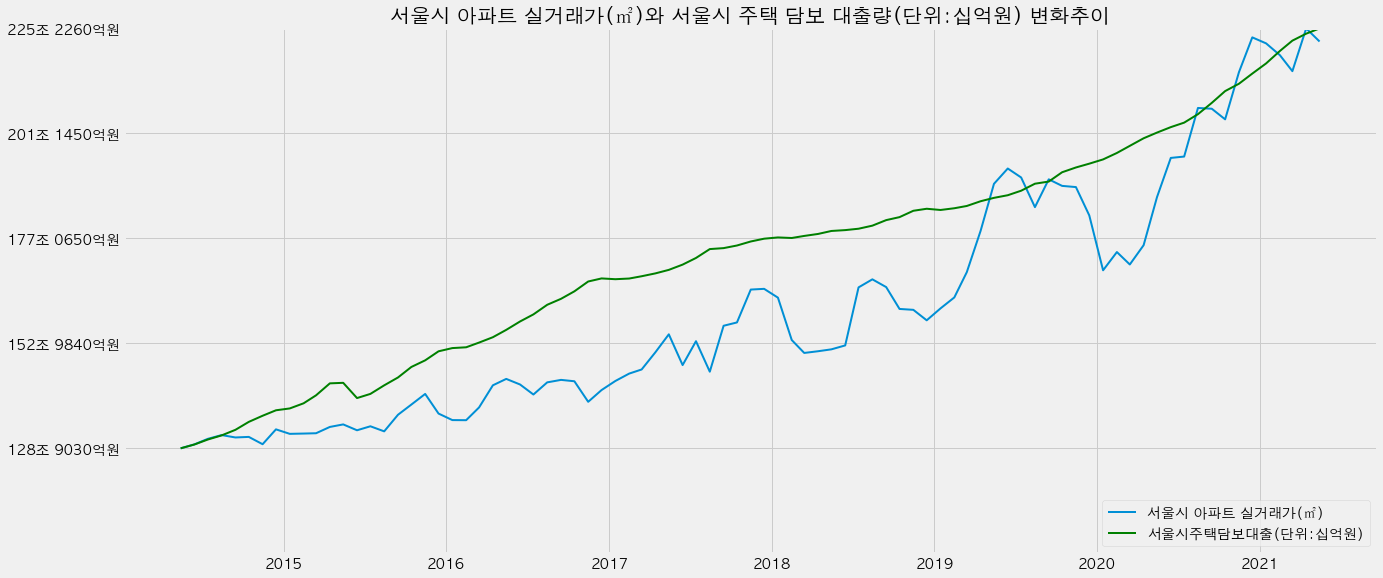

In [98]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2 ,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["서울시주택담보대출(단위:십억원)"],color='green',linewidth=2, markersize=12,label="서울시주택담보대출(단위:십억원)")
plt.title('서울시 아파트 실거래가(㎡)와 서울시 주택 담보 대출량(단위:십억원) 변화추이')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['128조 9030억원', '152조 9840억원', '177조 0650억원', '201조 1450억원', '225조 2260억원']) # y축 라벨을 코스피 지수로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()

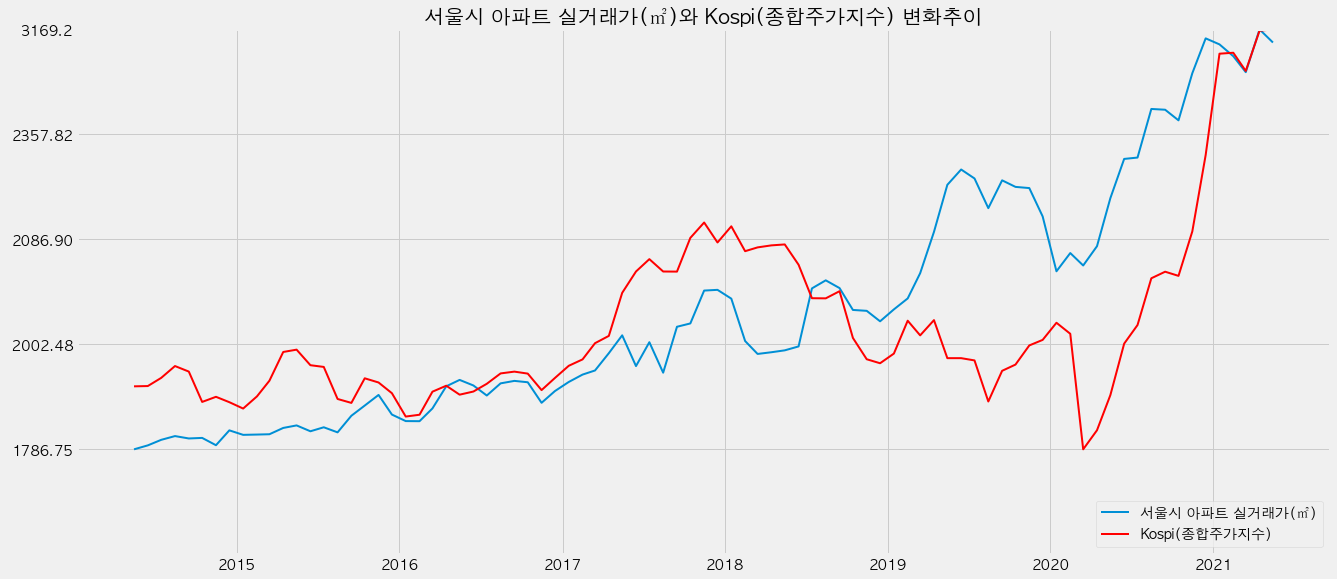

In [99]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["코스피지수"],color='red',linewidth=2, markersize=12,label="Kospi(종합주가지수)")
plt.title('서울시 아파트 실거래가(㎡)와 Kospi(종합주가지수) 변화추이')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['1786.75',' 2002.48','2086.90','2357.82','3169.2']) # y축 라벨을 코스피 지수로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()